In [33]:
import os
import pandas as pd

In [34]:
# Cambiar directorio
os.chdir("..")

In [37]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("./laboratorio-machine-learning/data/churn.csv")


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Manejo de datos nulos: no hay datos nulos. 

In [40]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
# Nos deshacemos de las columnas que no contribuyen en mucho
data = data.drop(data.columns[0:3], axis=1)

In [42]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Nuestra variable target es exited, un valor numérico. Ahora bien, queda convertir el resto de las variables categóricas a numéricas. 

Se inicializa un diccionario vacío llamado column_equivalence. Este diccionario se utilizará más adelante para almacenar la equivalencia entre las categorías y los valores numéricos correspondientes.

Se crea una lista llamada features que contiene los nombres de las columnas del dataset.

Se itera sobre cada columna del dataset y se obtiene su tipo de dato. La función data.dtypes devuelve los tipos de datos de todas las columnas en forma de objeto pandas Series. El bucle for i, column in enumerate(list([str(d) for d in data.dtypes])): itera sobre esta Series y asigna a i el índice de la columna y a column el tipo de dato de esa columna convertido a cadena.

Se verifica si el tipo de dato de la columna es "object", lo que indica que es una variable categórica. En caso afirmativo, se realiza el siguiente conjunto de pasos para convertirla a numérica:

Se rellenan los valores faltantes de la columna con la moda, utilizando el método fillna con data[data.columns[i]].mode(). La moda es el valor más frecuente en la columna y se utiliza para sustituir los valores faltantes.

Se convierte la columna categórica en un tipo de datos "category" mediante data[data.columns[i]].astype("category").

Se crea un diccionario llamado current_column_equivalence que asigna a cada valor categórico un número entero único. La función enumerate se utiliza para generar los pares de índice y valor categórico, y se guarda en current_column_equivalence.

El diccionario column_equivalence[i] se actualiza con un diccionario invertido de current_column_equivalence, donde las claves son los valores categóricos y los valores son los números enteros. Esto se hace mediante dict((v,k) for k,v in current_column_equivalence.items()).

Finalmente, se reemplaza la columna original con los códigos numéricos correspondientes utilizando categorical_column.cat.codes. Los códigos numéricos representan ahora las categorías en lugar de los valores originales.

Si el tipo de dato de la columna no es "object", lo que indica que es una variable numérica, se rellenan los valores faltantes de la columna con la mediana utilizando data[data.columns[i]].median(). La mediana es el valor medio de la columna y se utiliza para sustituir los valores faltantes.

En resumen, este código recorre cada columna del dataset y convierte las variables categóricas en numéricas utilizando el código de categoría correspondiente. Además, rellena los valores faltantes en ambas variables categóricas y numéricas. El diccionario column_equivalence almacena la equivalencia entre las categorías y los valores numéricos para su uso posterior si es necesario.

In [43]:
# Convertimos a numéricos los datos categóricos. Para más info: shorturl.at/y0269
column_equivalence = {}
features = list(data.columns)
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        categorical_column = data[data.columns[i]].astype("category")
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())
        data[data.columns[i]] = categorical_column.cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

Se pasaron las variables sexo y geografia a datos numéricos:

In [44]:
column_equivalence


{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


# ANÁLISIS DE CORRELACIÓN: 

Análizamos la relación entre las variablers para establecer las posibles relaciones lineales. 


In [46]:
import matplotlib.pyplot as plt

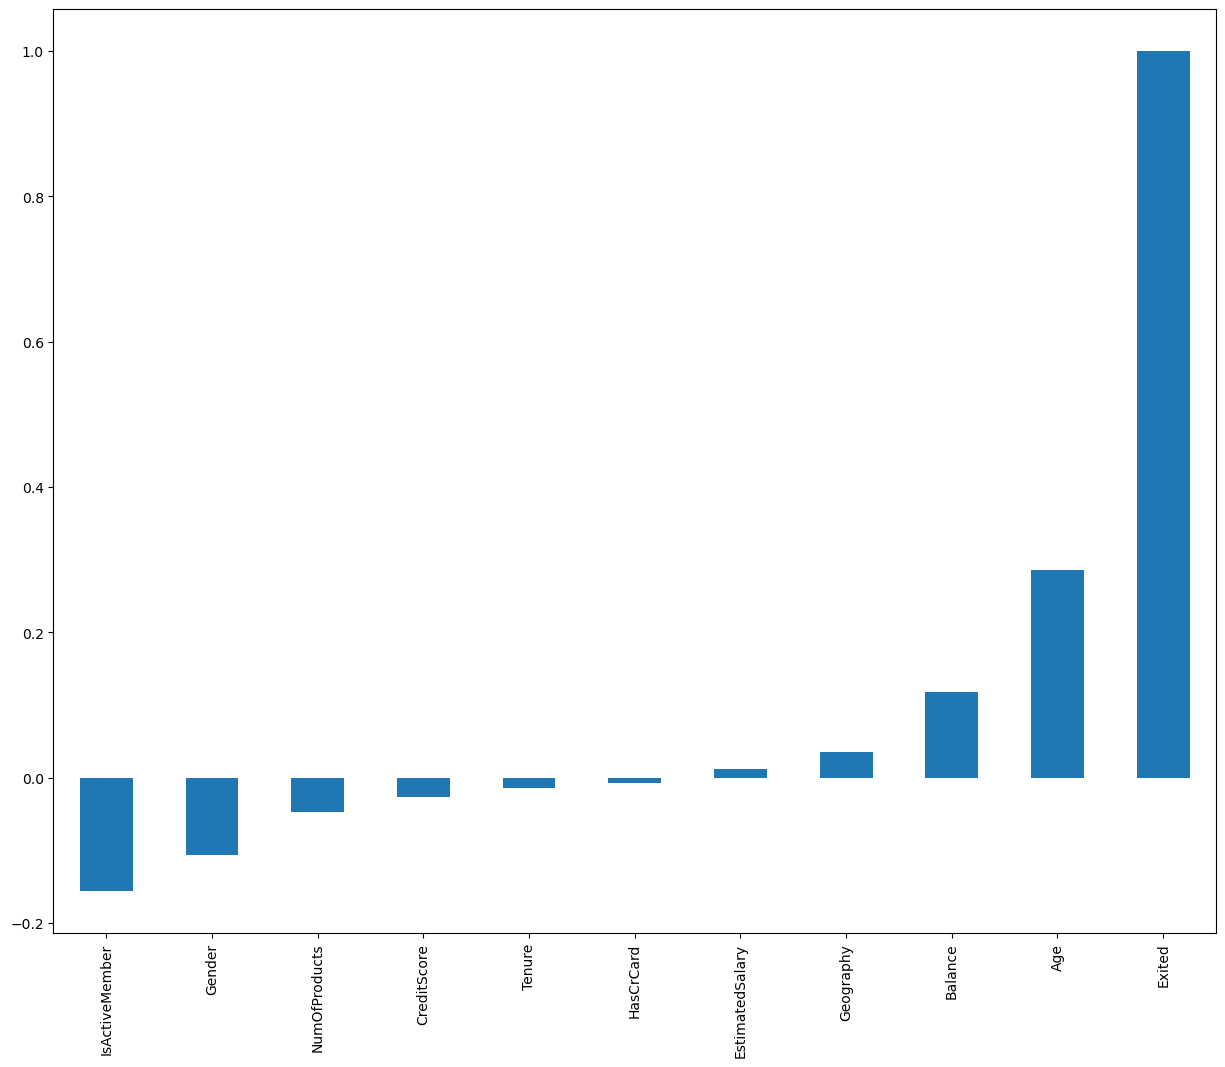

In [47]:
fig = plt.figure(figsize=(15,12))
data.corr()['Exited'].sort_values(ascending=True).plot(kind='bar')
plt.show()

Conclusión: Exited está a la derecha. Tiene correlación de 1 consigo misma porque la relación es totalmente directa. Las variables inmediatamente a la izquierda, como la edad, el balance y la geografía son las que tienen una relación directa mayor. 

# Escalabilidad de los datos

Llevamos los datos a la misma escala para que sea más fácil para el algoritmo entender cómo manejarlos. 

In [48]:
from sklearn.preprocessing import MinMaxScaler

creamos una nueva variable, un nuevo dataset escalado trabajado con el scaler:

In [49]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(data)

el df_data_processing_scaled nos llega como un array. Tenemos que convertirlo a un df de la siguiente manera: 

In [50]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [51]:
df_data_processing_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0


El df resultante no tiene el nombre de las columnas. Para recuperar el nombre de las columnas hacemos la igualación para utilizar las columnas del df_data_processing:

In [52]:
df_data_processing_scaled.columns = data.columns

In [53]:
df_data_processing_scaled.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0


## Análisis exploratorio de datos

In [54]:
import seaborn as sns

-Notar: hacemos análisis exploratorio con el dataset original, no el procesado. 
Conclusión: los hombres y mujeres se comportan igual respecto a la salida de la empresa. El valor cero representa a femeninas. 

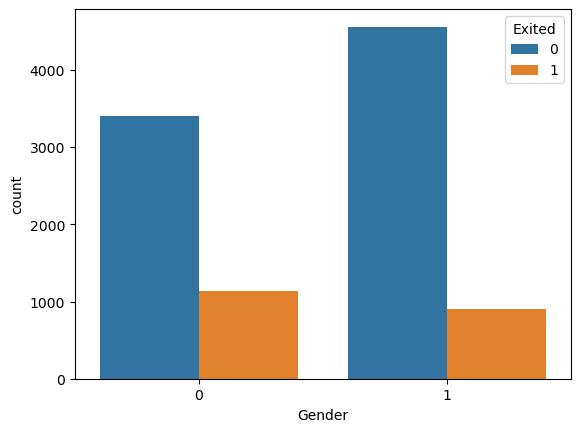

In [55]:
sns.countplot(data=data, x='Gender',hue='Exited')
plt.show()


-Creamos la función prot_categorical que recibe una columna. Por tanto: cada cosa que le enviemos va a ser graficada con la variable column, siempre separado por el hue=Exited.

In [56]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='Exited')
    plt.show()



definimos ahora la columna categórica (osea la variable que vamos a insertar en la función). Por tanto: de df_data seleccionamos dtypes incluyendo sólo los tipo objets. Queremos además que nos muestre las columnas: 

In [57]:
column_cat = data.select_dtypes(include='object').columns

In [58]:
for _ in column_cat:
    plot_categorial(_)

NO SALEN LOS GRÁFICOS! POR QUÉ?

Trabajamos ahora las variables numéricas. Hacemos gráficos de dispersión para identificar las relaciones. Separamos por color según el churn. 

Recordar: los que hacen Exited están representados por el color naranja. Notar como en algunos gráficos hay tendencia a que se junten en una región específica. 

<Figure size 1000x1000 with 0 Axes>

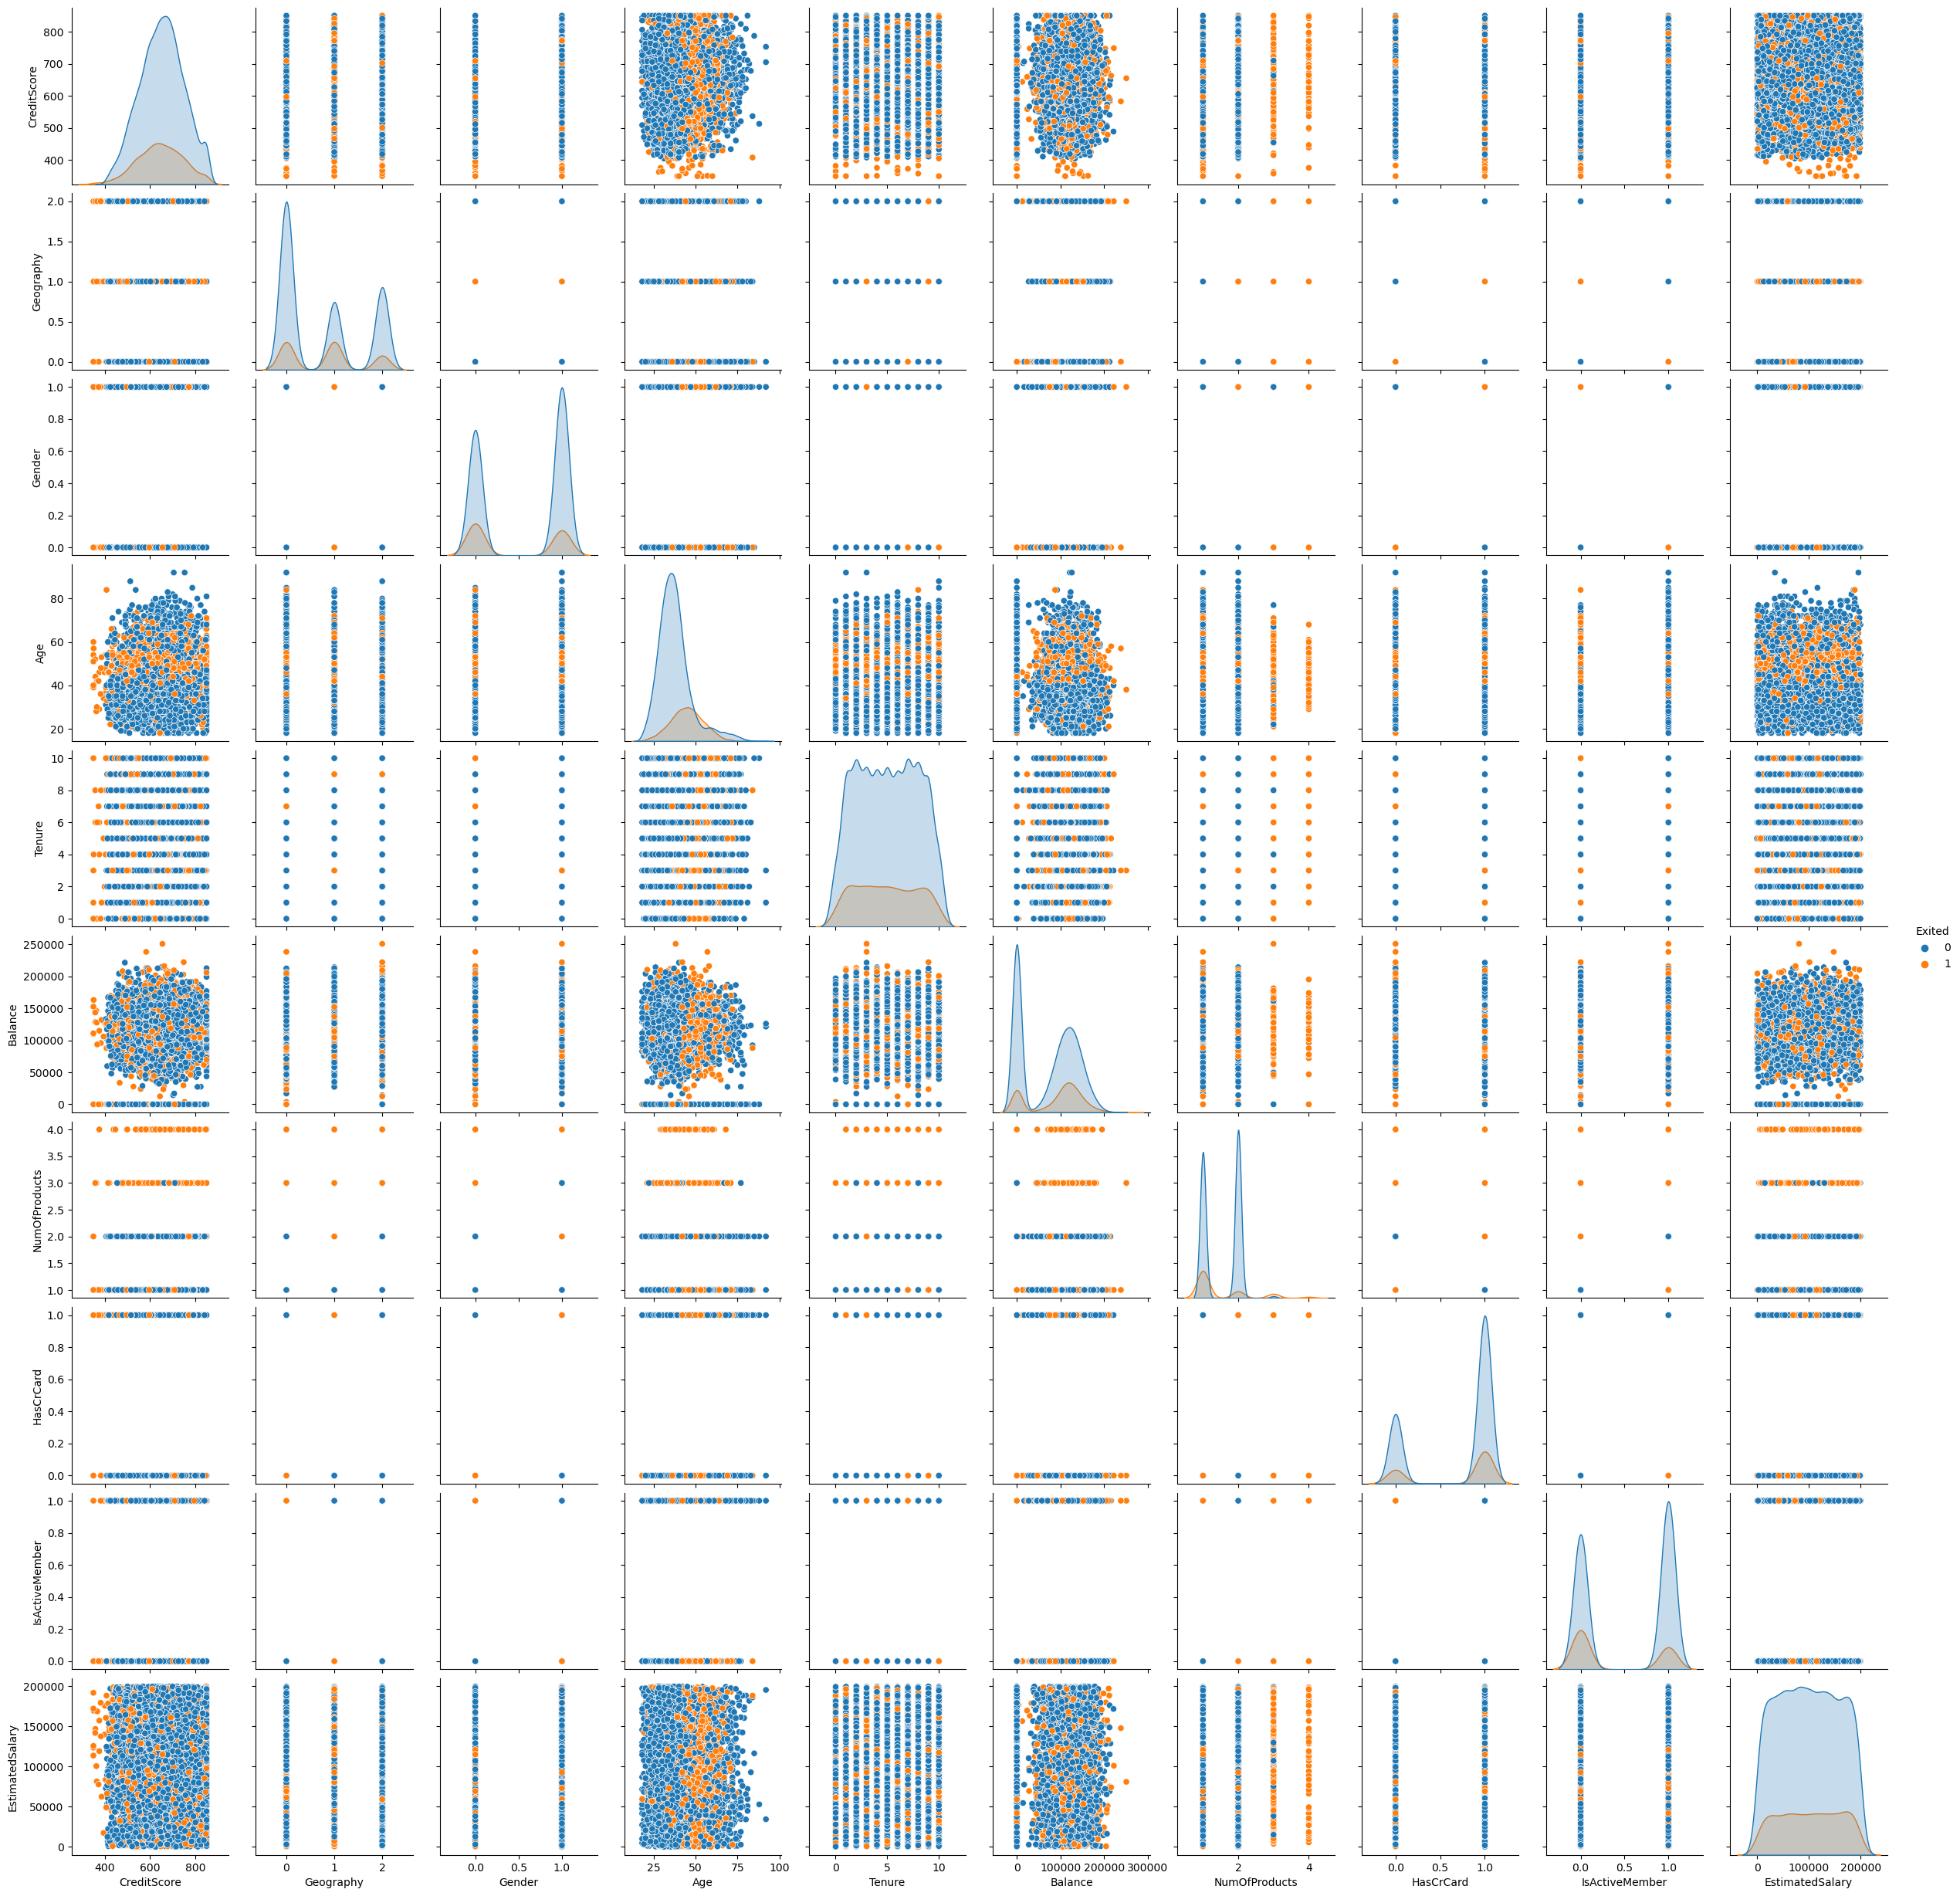

In [59]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= data, hue='Exited')
plt.show()

## CREACIÓN Y ENTRENAMIENTO DE MODELO

In [60]:
# Vamos a crear un modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [62]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
X = df_data_processing_scaled.drop('Exited',axis=1)
y = df_data_processing_scaled['Exited'].values

In [63]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Quedé aquí: revisar opciones de solver. 

In [67]:
# Crear el modelo y entrenarlo
model =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
result = model.fit(X_train, y_train)

In [31]:
# Medir los resultados obtenidos
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_lin.predict(X_test))


array([[2599,   58],
       [ 597,   46]])

In [32]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
pickle.dump(clf_lin, open("churn/models/model.pk", "wb"))
pickle.dump(column_equivalence, open("churn/models/column_equivalence.pk", "wb"))
pickle.dump(features, open("churn/models/features.pk", "wb"))